# Data uploading

In [1]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: C:\Users\Alan\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Module importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn.datasets
import pandas as pd

# Importation des données

In [3]:
ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['MedHouseVal'] = ds.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Nettoyage et exploration des données

In [4]:
print(df.isnull().sum())
print(df.dtypes)
print("Nombre de data dupliquer: ", df.duplicated().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
Nombre de data dupliquer:  0


# EDA

## Statistiques descriptives

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

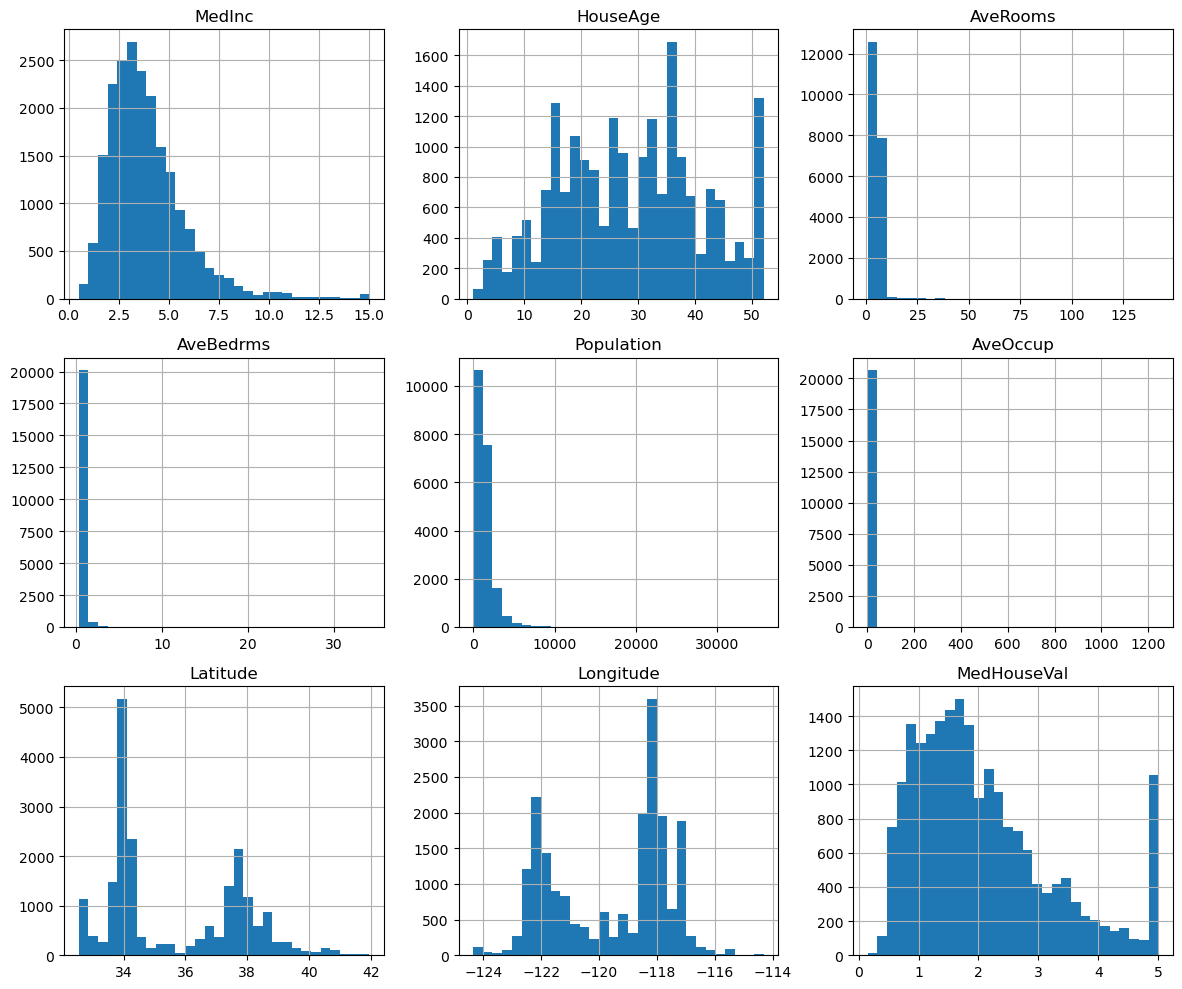

In [5]:
### Statistiques descriptives
print(df.describe())

# Histogrammes
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


## Boxplot de la target

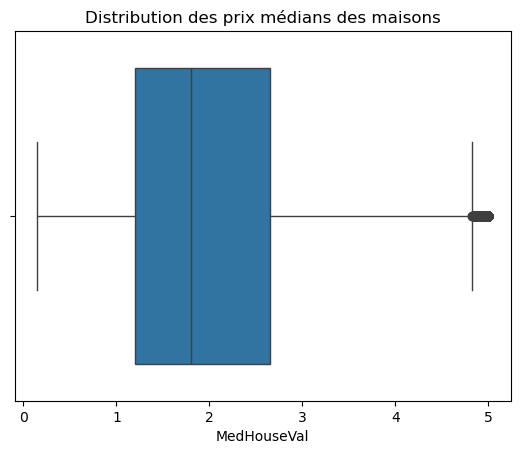

In [6]:
# Boxplot de la target
sns.boxplot(x=df['MedHouseVal'])
plt.title("Distribution des prix médians des maisons")
plt.show()

## Scatter plots clés

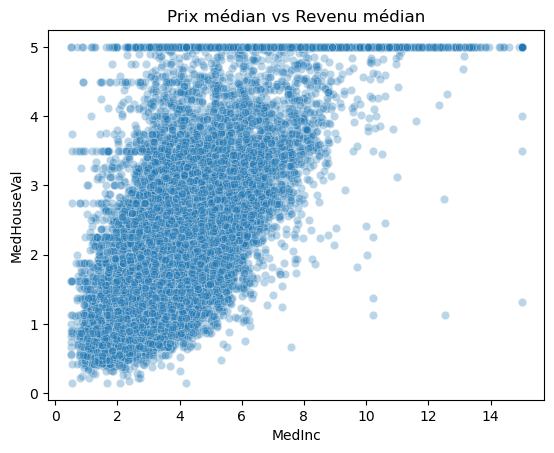

In [7]:
# Scatter plots clés
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title("Prix médian vs Revenu médian")
plt.show()

## Matrice de corrélation

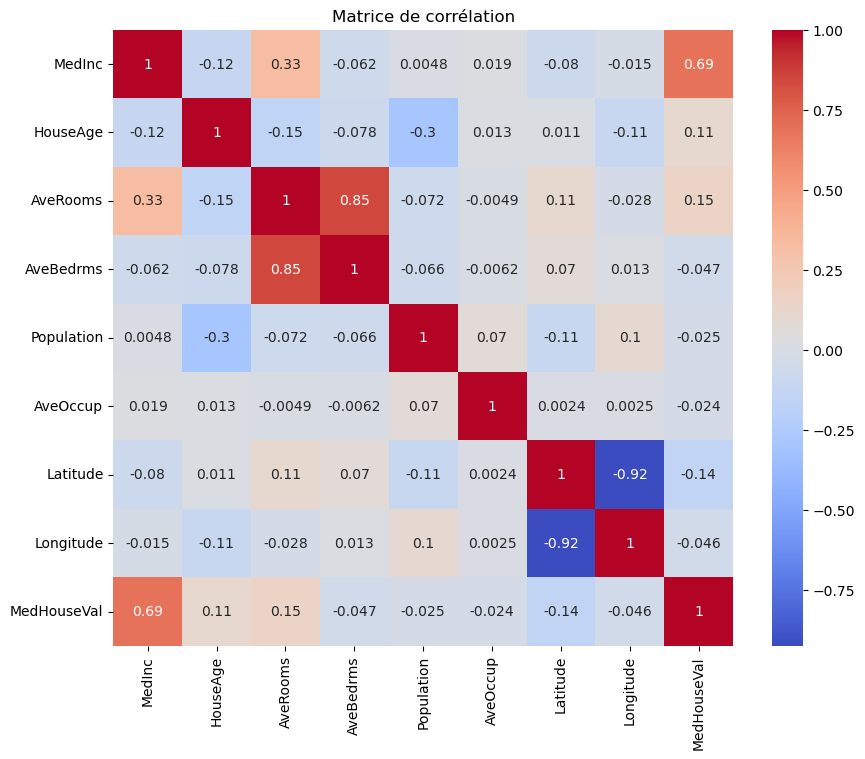

In [8]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

## Séparation des features (X) et de la target (y)

In [9]:
# Séparation des features (X) et de la target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (12384, 8), Val: (4128, 8), Test: (4128, 8)


# Normalisation (StandardScaler)

In [10]:
# Normalisation (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Baseline et modélisation

## Modèle de base

In [11]:
# Modèle de base
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

## Prédictions sur le validation set

In [12]:
# Prédictions sur le validation set
y_val_pred = lr.predict(X_val_scaled)

## Metriques et Régression Linéaires, MSE, MAE, R²

In [13]:
# Métriques
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Régression Linéaire - Validation Set:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Régression Linéaire - Validation Set:
MSE: 0.5326, MAE: 0.5336, R²: 0.5920


# Ridge Regression (L2)

In [14]:
# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_val_ridge = ridge.predict(X_val_scaled)
print(f"Ridge R²: {r2_score(y_val, y_val_ridge):.4f}")

Ridge R²: 0.5920


# Lasso Regression (L1)

In [15]:
# Lasso Regression (L1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_val_lasso = lasso.predict(X_val_scaled)
print(f"Lasso R²: {r2_score(y_val, y_val_lasso):.4f}")

Lasso R²: 0.5895


## Comparaison des coefficients

In [16]:
# Comparaison des coefficients
coeffs = pd.DataFrame({
    'Feature': ds.feature_names,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
print(coeffs)

      Feature    Linear     Ridge     Lasso
0      MedInc  0.850920  0.850832  0.796571
1    HouseAge  0.119466  0.119571  0.123874
2    AveRooms -0.314198 -0.313885 -0.175158
3   AveBedrms  0.361782  0.361402  0.221136
4  Population -0.001456 -0.001420 -0.000000
5    AveOccup -0.042436 -0.042440 -0.031810
6    Latitude -0.894468 -0.893467 -0.788888
7   Longitude -0.870951 -0.869934 -0.757286


# Evaluation finale

In [18]:
# Supposons que Ridge soit le meilleur (à vérifier via R²)
y_test_pred = ridge.predict(X_test_scaled)

print("\nPerformance finale sur le test set:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

# Intervalles de confiance (simplifié)
residuals = y_test - y_test_pred
std_err = np.std(residuals)
conf_int = 1.96 * std_err  # 95% CI
print(f"Intervalle de confiance des erreurs: ±{conf_int:.4f}")


Performance finale sur le test set:
MSE: 0.5546
MAE: 0.5337
R²: 0.5955
Intervalle de confiance des erreurs: ±1.4595
